## Imports

In [50]:
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy

sns.set()

In [16]:
pwd

'/Users/claudiavalverde/Documents/DS-master/semestre2/NLP/project1/nlp_deliv1_materials'

## Load Data

In [15]:
# use this to train and VALIDATE your solution
train_df = pd.read_csv("../nlp_deliv1_materials/quora_train_data.csv")

In [19]:
A_df, te_df = model_selection.train_test_split(train_df, test_size=0.05, random_state=123)
tr_df, va_df = model_selection.train_test_split(A_df, test_size=0.05, random_state=123)
print('tr_df.shape=',tr_df.shape)

tr_df.shape= (291897, 6)


In [20]:
tr_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
61482,125898,203030,203031,Is Java or C++ or C the most popular language ...,How do I develop a software which will have a ...,0
131546,36249,66113,66114,How do you convert direct speech into reported...,I feel weak at spoken English. I have sentence...,0
22927,199864,301469,301470,Where can I buy used wine barrels?,Where can you buy used wine barrels?,1
183520,277339,17728,138400,What was the best day of your life? (Excluding...,What is the Best Day of your life till date?,1
67694,392907,525647,525648,How is web-work.in works?,How do I get web designing work?,0


In [21]:
va_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
146205,378301,509685,56699,"Who is more dishonest, Donald Trump or Hillary...",Would you rather vote for Donald Trump or Hill...,0
99373,332237,459221,303879,What are the healthiest foods to eat for dinner?,Which is the healthiest food?,0
292307,283851,100550,99720,Can a dog take baby aspirin?,Is it safe to give my dog a baby aspirin and h...,1
73776,306170,87025,429632,What is churchofsatan.com?,What is Loadteam.com?,0
256938,24445,14806,12515,Why MS Dhoni left captaincy though he was a su...,Why does M.S Dhoni left captaincy for ODI and ...,1


## Analysis of the data

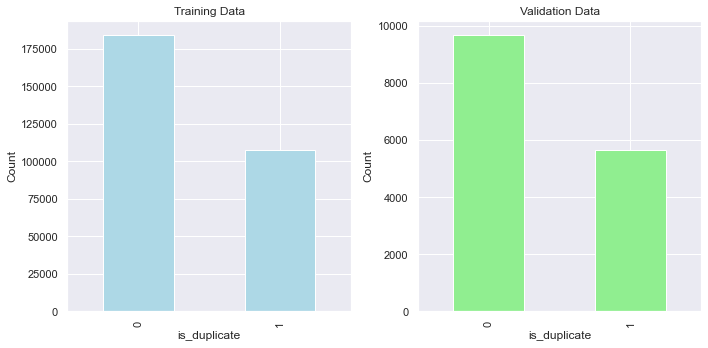

In [22]:
# Group by 'is_duplicate' and count the number of IDs for training and validation data
tr_counts = tr_df.groupby('is_duplicate')['id'].count()
va_counts = va_df.groupby('is_duplicate')['id'].count()

# Create a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot training data counts
tr_counts.plot(kind='bar', ax=axs[0], color='lightblue')
axs[0].set_title('Training Data')

# Plot validation data counts
va_counts.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Validation Data')

# Set common labels
for ax in axs:
    ax.set_xlabel('is_duplicate')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
qids = pd.Series(tr_df['qid1'].to_list() + tr_df['qid2'].to_list())
num_unique_questions = len(np.unique(qids))
non_unique_questions = np.sum(qids.value_counts() > 1)
percentage_non_unique_questions = ( non_unique_questions / num_unique_questions ) * 100

print("Statistics on Question IDs \n","---"*35)
print(f"Number of Unique Questions: {num_unique_questions}")
print(f"Number of Non-Unique Questions: {non_unique_questions}")
print(f"Percentage of Non-Unique Questions: {percentage_non_unique_questions:.2f}%")
print(f"Maximum Times a Question Got Repeated: {qids.value_counts().iloc[0]}")

Statistics on Question IDs 
 ---------------------------------------------------------------------------------------------------------
Number of Unique Questions: 414213
Number of Non-Unique Questions: 75805
Percentage of Non-Unique Questions: 18.30%
Maximum Times a Question Got Repeated: 125


In [28]:
pair_duplicates = tr_df[['qid1', 'qid2', 'is_duplicate']].groupby(['qid1', 'qid2']).count().reset_index()
num_duplicated_questions = pair_duplicates.shape[0] - tr_df.shape[0]
print(f"Number of duplicated questions: {num_duplicated_questions}")

Number of duplicated questions: 0


In [31]:
# preprocessing
# filling Nan values as ''

df = tr_df.fillna('')

## TF-IDF
Is a measure that can be used to build feature vectors. It measures the importance of a word to a document corpus.

**TF**: *term frequency*,  emphasizes words taht appear frequently in a geiven document.

**IDF**: *inverse document frequency*, empasizes words that appear rarely in a set of documents.


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

questions = list(df['question1']) + list(df['question2'])
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(questions)

In [44]:
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [55]:
#ajuntar df + tfidf de manera 'normal'


df1 = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names())
df1
#df.drop('text', axis=1, inplace=True)
#res = pd.concat([df, df1], axis=1)

,00,000,0000,000000,00000000,00000074,0000021210,0001,0002,000inr,...,북쪽앟관자키,분위기,불타오르네,슬마,심하잖아,이정현,친구해도,쾌지나칭칭나네,한글,ﬁnd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- cosine vs eucledian distance
- nearest neighbour search
- the hashing trick (feature hashing), LSH
- siamese model !!!